## Linear Models as Neural Networks 

This is assignment one for my fourth year Biomedical Engineering studnets class of 2021


## Various Python imports

In [ ]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

In [ ]:
print(tf.__version__)


2.4.1


## Define a dataset

In [ ]:
X=np.arange(-10, 10, 0.01).reshape(-1, 1)
# X = X/10;
Y=np.square(X)+2

In [ ]:
len(X)

2000

In [ ]:
X_test=np.arange(-20, 20, 1).reshape(-1, 1)
# X_test = X_test/20
Y_test=np.square(X_test)+2

In [ ]:
#Applying polynomial transformation to the values of X and X_test
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly_features.fit_transform(X)
X_test_poly = poly_features.fit_transform(X_test)

## Plot training data

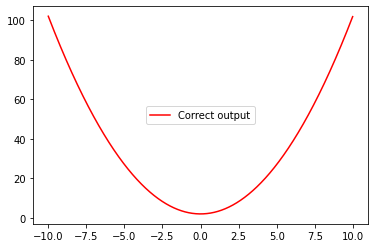

In [ ]:
plt.plot(X,Y,color='r',label='Correct output')
plt.legend(loc='center')
plt.show()

## Plot testing data

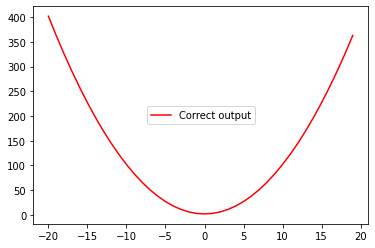

In [ ]:
plt.plot(X_test,Y_test,color='r',label='Correct output')
plt.legend(loc='center')
plt.show()

## Define a sequential model and add layers

In [ ]:
## Your code here
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential


model = Sequential([Dense(10, input_shape = [len(X_train_poly[0])], activation = 'relu'),
                  Dense(10, activation = 'relu'),
                    Dense(10, activation = 'relu'),
                  Dense(1)])

## Compile the model

In [ ]:
## Your code here
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import RootMeanSquaredError, MeanSquaredError, MeanAbsoluteError

model.compile(optimizer = Adam(lr = 0.001), loss = 'mse', metrics=[MeanAbsoluteError(),MeanSquaredError()])


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model.predict(poly_features.fit_transform(np.array(100).reshape(1,-1)))

NameError: ignored

## Train the model

In [ ]:
## Your code here
history = model.fit(X_train_poly, Y, epochs = 300, validation_split = 0.1)

NameError: ignored

In [ ]:
model.predict(poly_features.fit_transform(np.array(100).reshape(1,-1)))

array([[10066.734]], dtype=float32)

## Plot the training history

In [ ]:
import pandas as pd
df = pd.DataFrame(history.history)
df.head()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
0,1057.920898,24.342968,1057.920898,2716.012695,51.729004,2716.012695
1,251.996063,11.591994,251.996063,178.419617,13.292414,178.419617
2,4.083881,1.480368,4.083881,0.174347,0.394829,0.174347
3,0.458648,0.577805,0.458648,0.563953,0.717342,0.563953
4,0.201293,0.351823,0.201293,0.818142,0.877454,0.818142


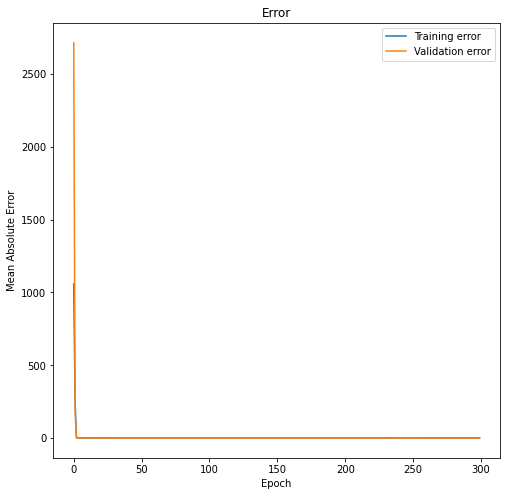

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['mean_squared_error'], label = 'Training error')
plt.plot(history.history['val_mean_squared_error'], label = 'Validation error')
plt.title('Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Plot the training data and predictions

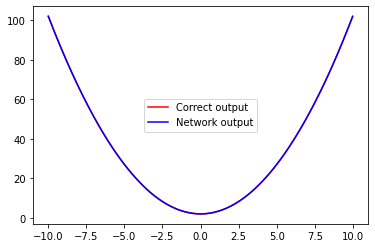

In [ ]:
plt.plot(X,Y,color='r',label='Correct output')
plt.plot(X,model.predict(X_train_poly),color='b',label='Network output')
plt.legend(loc='center')
plt.show()

## Plot the testing data and predictions

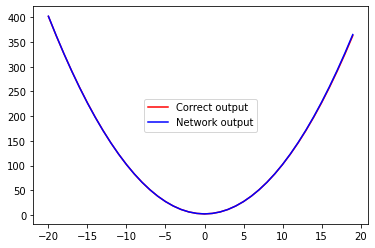

In [ ]:
plt.plot(X_test,Y_test,color='r',label='Correct output')
plt.plot(X_test,model.predict(X_test_poly),color='b',label='Network output')
plt.legend(loc='center')
plt.show()

## Predict on some value

In [ ]:
samples = np.array([10,15,20]).reshape(-1,1)
print(samples)
samples.shape

[[10]
 [15]
 [20]]


(3, 1)

In [ ]:
samples_poly = poly_features.fit_transform(samples)
model.predict(samples_poly)

array([[102.235664],
       [228.26137 ],
       [404.58792 ]], dtype=float32)

In [ ]:
samples**2+2

array([[102],
       [227],
       [402]])

## View the weights of the model

In [ ]:
model.get_weights()

[array([[-0.10108727, -0.48644033,  0.14052553, -0.30534217,  0.9555995 ,
         -0.56454283, -0.49118567, -0.06470362,  0.6112355 , -0.20211716],
        [-0.02044029, -0.6404825 ,  0.18380104, -0.07680275, -0.12325442,
          0.79414386,  0.17164882, -0.53826624,  0.37940502,  0.7011688 ]],
       dtype=float32),
 array([ 0.52614397, -0.12596013,  0.05582517,  0.68162864,  0.6071896 ,
         0.15424934, -0.17532286, -0.00600376,  0.2005985 ,  0.13806708],
       dtype=float32),
 array([[ 0.2811924 ,  0.4856479 , -0.81897587,  0.42339253,  0.5899563 ,
          0.05401957,  0.25366646, -0.09176102,  0.3285306 ,  0.9124899 ],
        [ 0.2622816 ,  0.47270977, -0.15443334, -0.10266972, -0.24677683,
          0.01909278, -0.04051067,  0.69108456, -0.01046453,  0.7863072 ],
        [ 0.30438933, -0.03507963, -0.44841784,  0.08032399,  0.6297163 ,
          0.3861822 ,  0.10772721,  0.05707357, -0.21564963,  0.19282578],
        [-0.40745524,  0.50758   , -0.28151608, -0.05388521, 

## Tasks

* Run the notebook yourself and check that you understand the various aspects

* Try predicting for another value, is the answer correct?

* Train the model for a different number of epochs (e.g. small number of epochs), are the results as good? ***NOTE: if you want to train a model again after changing a hyper-parameter you need to execute the model initialisation again. If not, you will resume training from whatever state the weights and biases were previously!***


